In [1]:
import numpy as np
from cgd_funcs import Funcs
from cgd import CGD

# Of the shelf solver CGD
from scipy.optimize import minimize
from numpy import linalg as la

# Plotting
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

font = {'size':15}
plt.rc('font', **font)

In [2]:
def plot_summary(error_mx, residual_mx, matrix):
    
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].plot(list(range(0,len(residual_mx)-1)), residual_mx[:-1], label = "Residual")
    axs[1].plot(list(range(0,len(error_mx)-1)), error_mx[:-1], label = "Relative Error", color="orange")
    
    axs[0].legend()
    axs[1].legend()
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Residual")
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Relative Error")
    fig.suptitle("["+matrix+"]"+"[epsilon = 1e-5] Residual and Relative Error plot")
    #fig.suptitle(matrix_name + " " + method_name + " Residual and Error plot")

In [3]:
# loading the matrices
M1 = np.loadtxt('../data/M1.txt')
x0_m1 = np.loadtxt('../data/x0_m1.txt')

M2 = np.loadtxt('../data/M2.txt')
x0_m2 = np.loadtxt('../data/x0_m2.txt')

M3 = np.loadtxt('../data/M3.txt')
x0_m3 = np.loadtxt('../data/x0_m3.txt')

M4 = np.loadtxt('../data/M4.txt')
x0_m4 = np.loadtxt('../data/x0_m4.txt')

M5 = np.loadtxt('../data/M5.txt')
x0_m5 = np.loadtxt('../data/x0_m5.txt')

### Util Function for off-shelf CGD solved

In [4]:
def off_shelf_opt(matrix, vector):
    funcs = Funcs(matrix)
    res = minimize(funcs.func_, vector, method='CG', jac=funcs.func_grad_, tol=1e-5, options={'gtol': 1e-6, 'disp': False})
    fx = res.fun
    
    num_iterations = res.nit
    if res.success:
        print("Convergence reached in " + str(num_iterations) + " iterations")
    else:
        print("Convergence not reached")
    
    computed_norm = np.sqrt(-fx)
    correct_norm = la.norm(matrix, 2)
    error = abs(computed_norm - correct_norm) / abs(correct_norm)
    
    print("Computed Norm: " + str(computed_norm))
    print("True Norm: " + str(correct_norm))
    print("Relative Error: " + str(error))

### M1 - Matrix Test

In [5]:
funcs = Funcs(M1)
# Initialize the CGD algorithm.
m1_norm = np.linalg.norm(M1, ord=2)
cgd_m1 = CGD(m1_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m1, 1e-5, 1000, method='HS', verboose=False)
# Run the algorithm.
residual_m1, errors_m1, result_m1 = cgd_m1.cgd()

In [6]:
len(errors_m1)

490

In [7]:
%%timeit -r 10
# Measuring running time
cgd_m1.cgd()

3.11 s ± 311 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


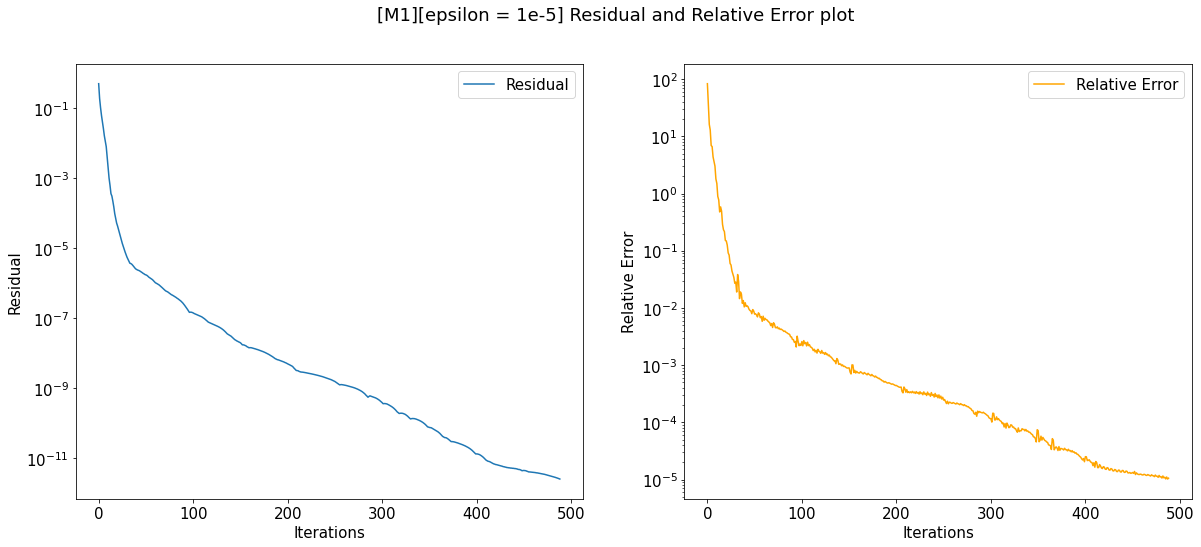

In [8]:
plot_summary(residual_m1, errors_m1, "M1")

In [9]:
%%timeit -r 10
# Norm of matrix M1
np.linalg.norm(M1, ord=2)

685 ms ± 33.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [10]:
# CGD norm result
np.sqrt(abs(result_m1))

72.40864404738393

In [11]:
# Relative Error 
abs(m1_norm - np.sqrt(abs(result_m1))) / abs(m1_norm)

2.4487246876921353e-12

In [12]:
off_shelf_opt(M1, x0_m1)
funcs = Funcs(M1)

Convergence reached in 65 iterations
Computed Norm: 72.40864404753631
True Norm: 72.40864404756124
Relative Error: 3.4423844691929194e-13


In [13]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m1, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

461 ms ± 33.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### M2 - Matrix Test

In [14]:
funcs = Funcs(M2)
# Initialize the CGD algorithm.
m2_norm = np.linalg.norm(M2, ord=2)
cgd_m2 = CGD(m2_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m2, 1e-5, 1000, method='HS', verboose=False)

# Run the algorithm.
residual_m2, errors_m2, result_m2 = cgd_m2.cgd()

In [15]:
len(errors_m2)

153

In [16]:
%%timeit -r 10
# Measuring running time.
cgd_m2.cgd()

54.9 ms ± 13.8 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


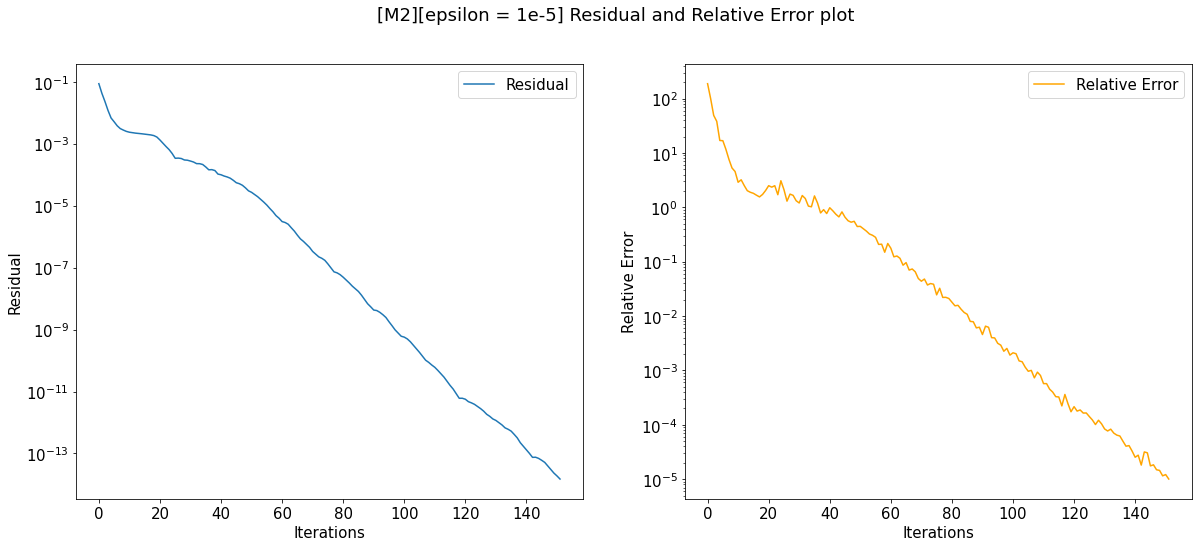

In [17]:
plot_summary(residual_m2, errors_m2, "M2")

In [18]:
%%timeit -r 10
# Norm of matrix M2
np.linalg.norm(M2, ord=2)

116 ms ± 25.1 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [19]:
# CGD norm result
np.sqrt(abs(result_m2))

109.46751097963057

In [20]:
# Error
abs(m2_norm - np.sqrt(abs(result_m2))) / abs(m2_norm)

1.233271119314464e-14

In [21]:
off_shelf_opt(M2, x0_m2)
funcs = Funcs(M2)

Convergence reached in 89 iterations
Computed Norm: 109.46751097963158
True Norm: 109.46751097963192
Relative Error: 3.115632301426014e-15


In [22]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m2, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

46.1 ms ± 10.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### M3 - Matrix Test

In [23]:
funcs = Funcs(M3)
# Initialize the CGD algorithm.
m3_norm = np.linalg.norm(M3, ord=2)
cgd_m3 = CGD(m3_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m3, 1e-5, 1000, method='HS', verboose=False)

# Run the algorithm.
residual_m3, errors_m3, result_m3 = cgd_m3.cgd()

In [24]:
len(errors_m3)

60

In [25]:
%%timeit -r 10
# Measuring running time
cgd_m3.cgd()

285 ms ± 25.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


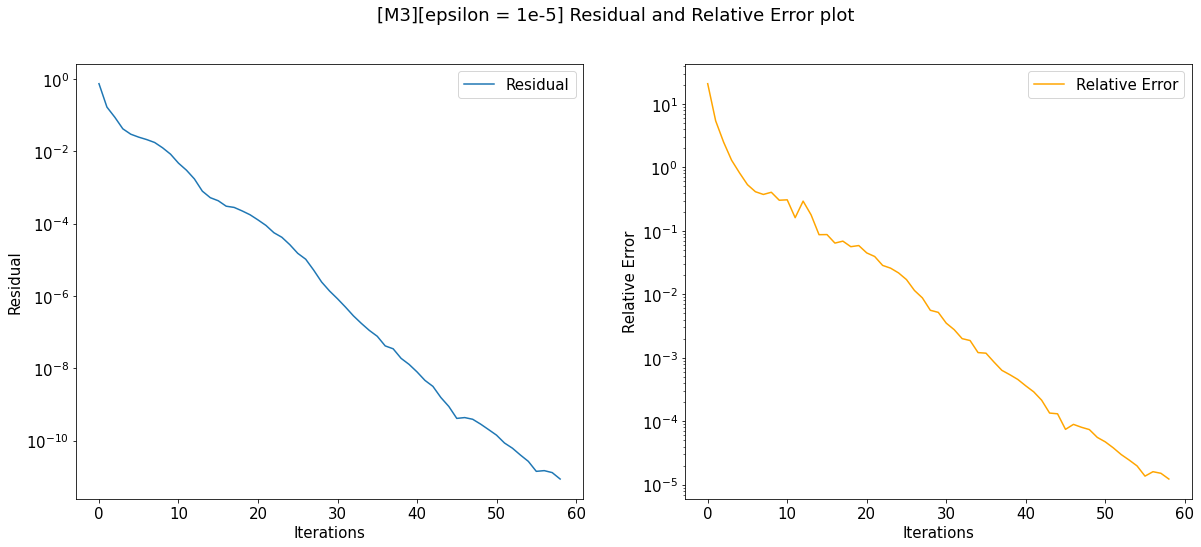

In [26]:
plot_summary(residual_m3, errors_m3, "M3")

In [27]:
%%timeit -r 10
# Norm of matrix M3
np.linalg.norm(M3, ord=2)

10.7 ms ± 670 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [28]:
# CGD norm result
np.sqrt(abs(result_m3))

41.06555327339819

In [29]:
# Error
abs(m3_norm - np.sqrt(abs(result_m3))) / abs(m3_norm)

6.043122181695551e-12

In [30]:
off_shelf_opt(M3, x0_m3)
funcs = Funcs(M3)

Convergence reached in 36 iterations
Computed Norm: 41.065553273443705
True Norm: 41.06555327364635
Relative Error: 4.9347146716474e-12


In [31]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m3, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

422 ms ± 42.2 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


### M4 - Matrix Test

In [32]:
funcs = Funcs(M4)
# Initialize the CGD algorithm.
m4_norm = np.linalg.norm(M4, ord=2)
cgd_m4 = CGD(m4_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m4, 1e-5, 1000, method='HS', verboose=False)

# Run the algorithm.
residual_m4, errors_m4, result_m4 = cgd_m4.cgd()

In [33]:
len(errors_m4)

64

In [52]:
%%timeit -r 10
# Measuring running time
cgd_m4.cgd()

26.1 ms ± 1.63 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


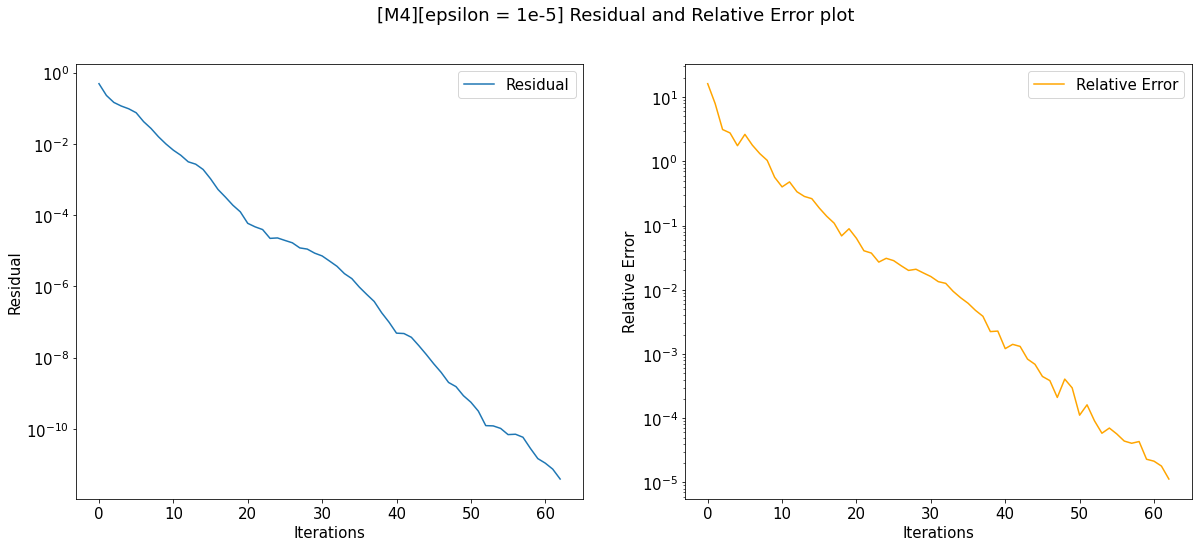

In [35]:
plot_summary(residual_m4, errors_m4, "M4")

In [36]:
%%timeit -r 10
# Norm of matrix M4
np.linalg.norm(M4, ord=2)

1.57 ms ± 33.3 µs per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [37]:
# CGD norm result
np.sqrt(abs(result_m4))

19.35695936889391

In [38]:
# Error
abs(m4_norm - np.sqrt(abs(result_m4))) / abs(m4_norm)

2.2062954371540307e-12

In [39]:
off_shelf_opt(M4, x0_m4)
funcs = Funcs(M4)

Convergence reached in 32 iterations
Computed Norm: 19.356959368934493
True Norm: 19.356959368936618
Relative Error: 1.0975498472823477e-13


In [40]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m4, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

20 ms ± 3.3 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


### M5 - Matrix

In [41]:
funcs = Funcs(M5)
# Initialize the CGD algorithm.
m5_norm = np.linalg.norm(M5, ord=2)
cgd_m5 = CGD(m5_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m5, 1e-5, 1000, method='HS', verboose=False)

# Run the algorithm.
residual_m5, errors_m5, result_m5 = cgd_m5.cgd()

In [42]:
len(errors_m5)

29

In [43]:
%%timeit -r 10
# Measuring running time
cgd_m5.cgd()

10.1 ms ± 1.18 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


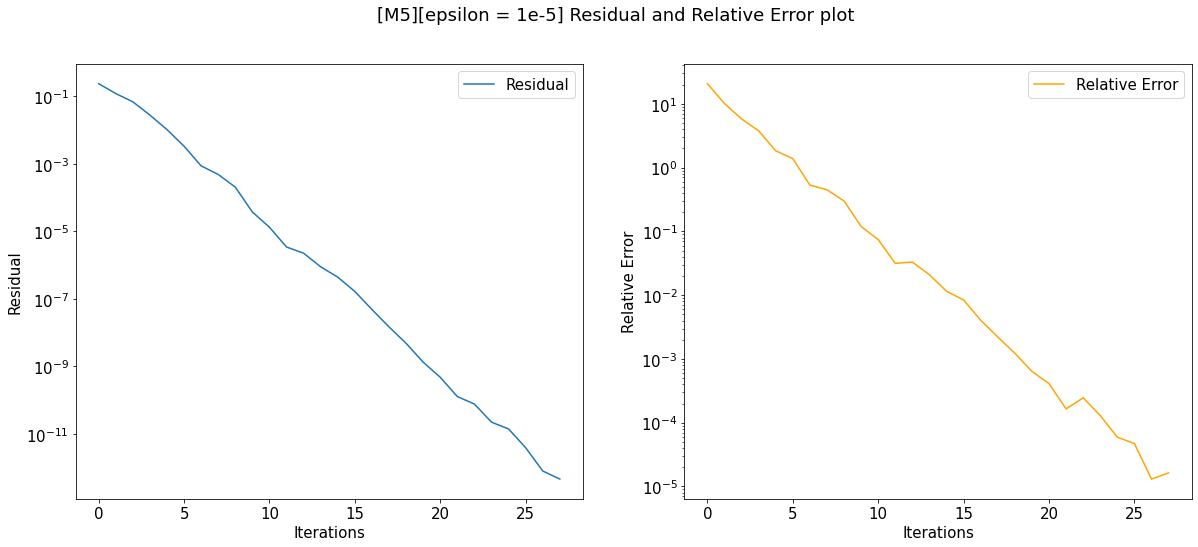

In [44]:
plot_summary(residual_m5, errors_m5, "M5")

In [45]:
%%timeit -r 10
# Norm of matrix M5
np.linalg.norm(M5, ord=2)

6.06 ms ± 379 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [46]:
# CGD norm result
np.sqrt(abs(result_m5))

23.624892381967626

In [47]:
# Error
abs(m5_norm - np.sqrt(abs(result_m5))) / abs(m5_norm)

1.2000331979697838e-13

In [48]:
off_shelf_opt(M5, x0_m5)
funcs = Funcs(M5)

Convergence reached in 23 iterations
Computed Norm: 23.624892381969808
True Norm: 23.62489238197046
Relative Error: 2.7669938399303286e-14


In [49]:
%%timeit -r 10
# Measuring running time
minimize(funcs.func_, x0_m5, method='CG', jac=funcs.func_grad_, options={'gtol': 1e-5, 'disp': False})

8.77 ms ± 346 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


### Analysis on failure to converge on M2

In [50]:
x0_m2_random = np.round(np.random.randn(100),decimals = 3)
cgd_m2 = CGD(m2_norm,funcs.func_,funcs.func_grad_,funcs.exact_line_search,x0_m2_random, 1e-5, 1000, method='HS', verboose=False)
residual_m2, errors_m2, result_m2 = cgd_m2.cgd()

In [51]:
# Error
abs(m2_norm - np.sqrt(abs(result_m2))) / abs(m2_norm)

0.784183524677403

From the exeperiment we can observe that the algorithm is converging to local minima.